## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

## Import data

In [2]:
df = pd.read_csv("cluster.csv")
df.head()

,-0.062737,1.1506,-0.26388
0,0.009840,1.109400,0.026539
1,0.634140,1.198600,0.130720
2,-0.025846,1.009500,0.065832
3,-0.076149,-0.100250,0.154570
4,1.007600,0.054311,0.091948


In [3]:
df.columns = ['c1', 'c2', 'c3']
df.describe()

,c1,c2,c3
count,299.000000,299.000000,299.000000
mean,0.374730,0.508777,0.078637
std,0.428719,0.466875,0.219341
min,-0.232700,-0.279110,-0.285590
25%,0.008821,0.054251,-0.052426
50%,0.232330,0.503600,0.016889
75%,0.794135,0.976820,0.130915
max,1.230600,1.292300,0.717910


## Use of KMeans and Elbow - method to find the number of clusters

c:\Users\manth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


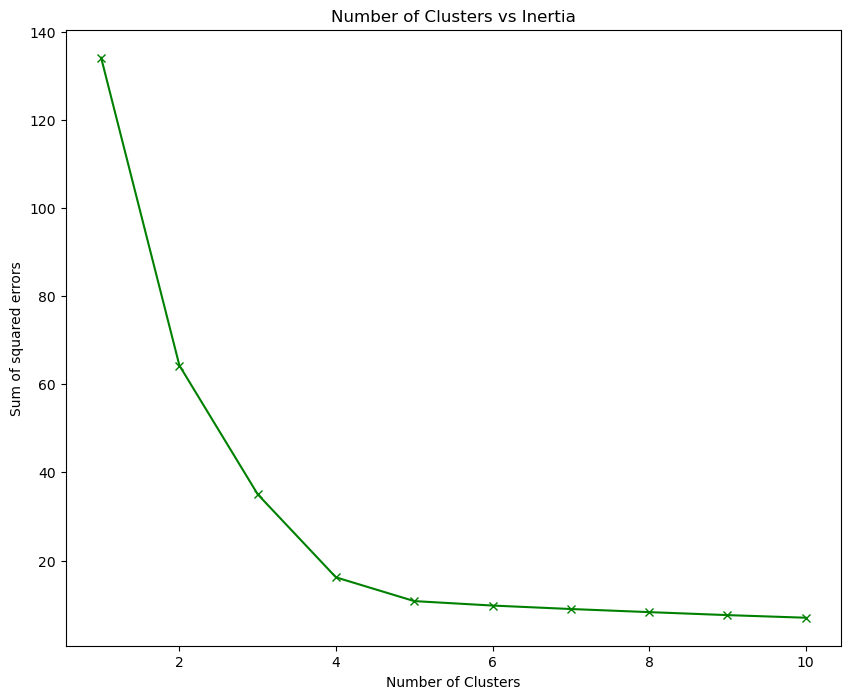

In [4]:
data = df.values
n_cluster_range = range(1, 11)
inertia = []

for i in n_cluster_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), inertia, '-gx')
plt.title('Number of Clusters vs Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared errors')
plt.show()

## Use of Silhouette algorithm to find the number of clusters

Running Silhouette Analysis on ...
For n_clusters = 2 The average silhouette_score is : 0.4912596788448148
For n_clusters = 3 The average silhouette_score is : 0.5721664418478148
For n_clusters = 4 The average silhouette_score is : 0.6601037243443381
For n_clusters = 5 The average silhouette_score is : 0.6427619699092126
For n_clusters = 6 The average silhouette_score is : 0.5930740814958795
For n_clusters = 7 The average silhouette_score is : 0.4832729243308441
For n_clusters = 8 The average silhouette_score is : 0.349599759907508
For n_clusters = 9 The average silhouette_score is : 0.3624720882952137
For n_clusters = 10 The average silhouette_score is : 0.3602456429279838


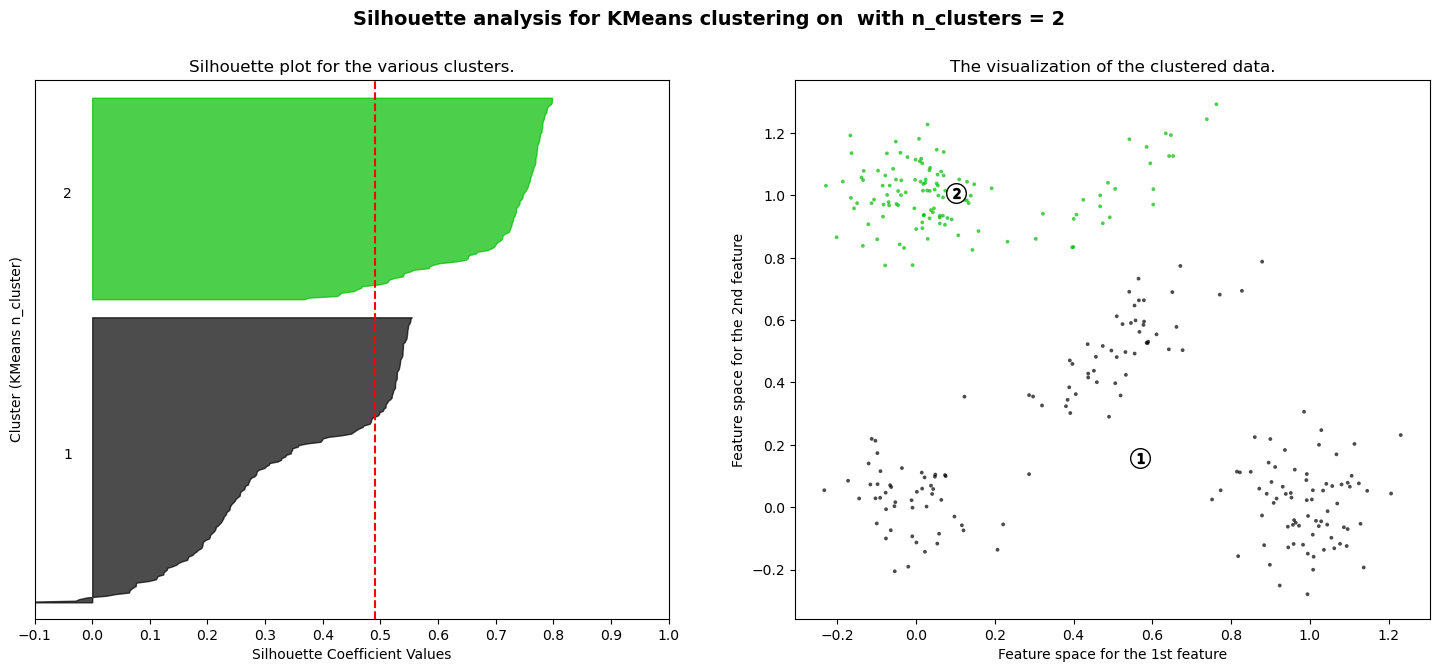

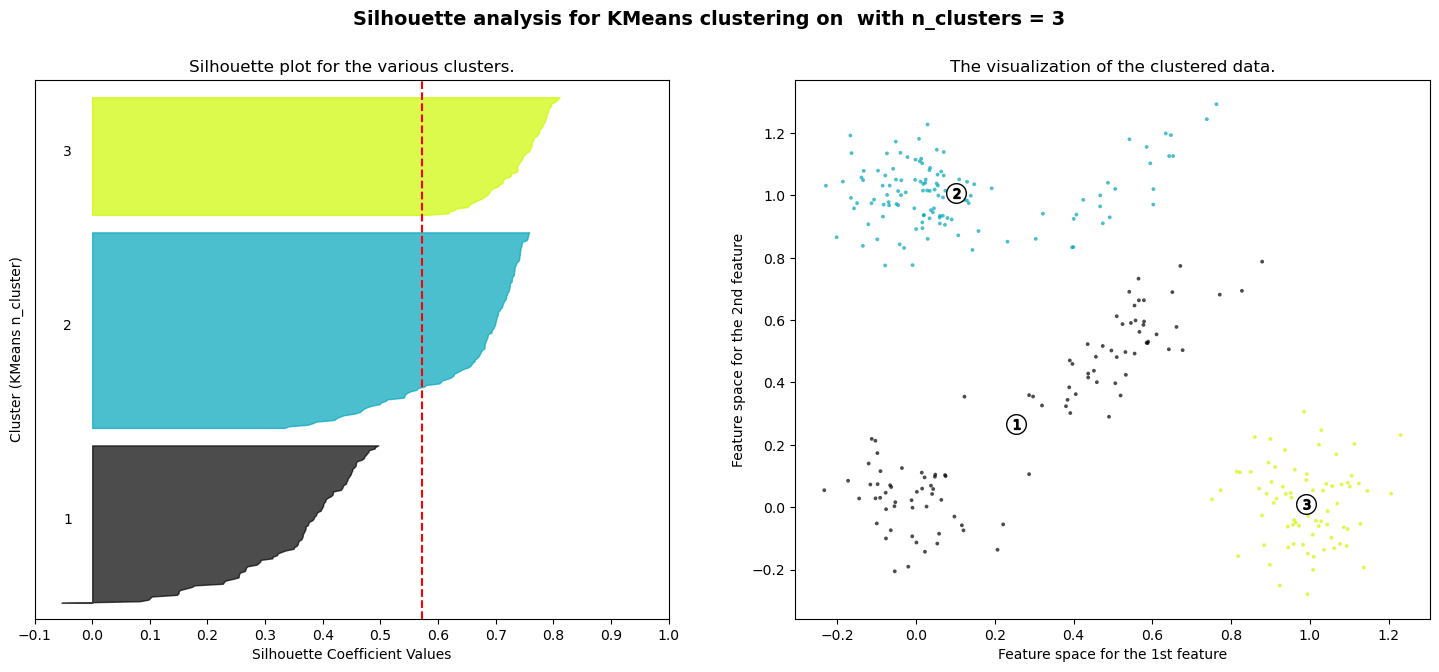

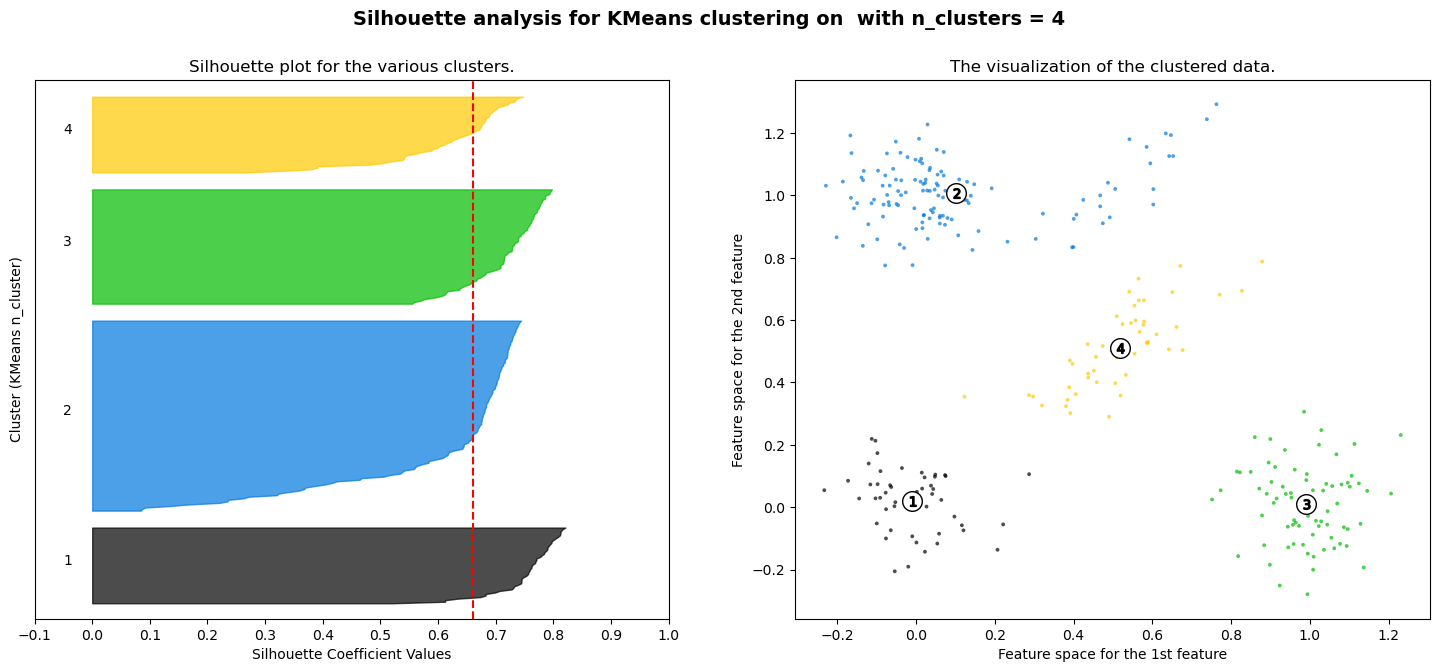

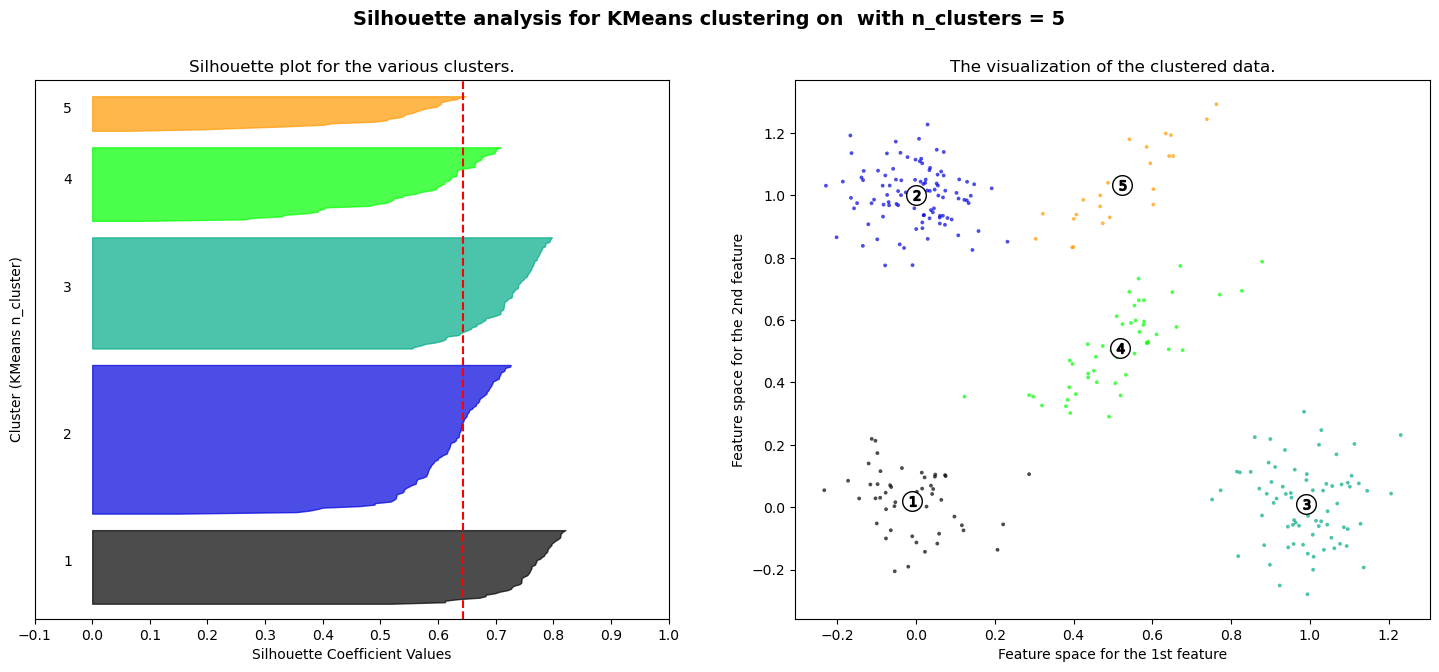

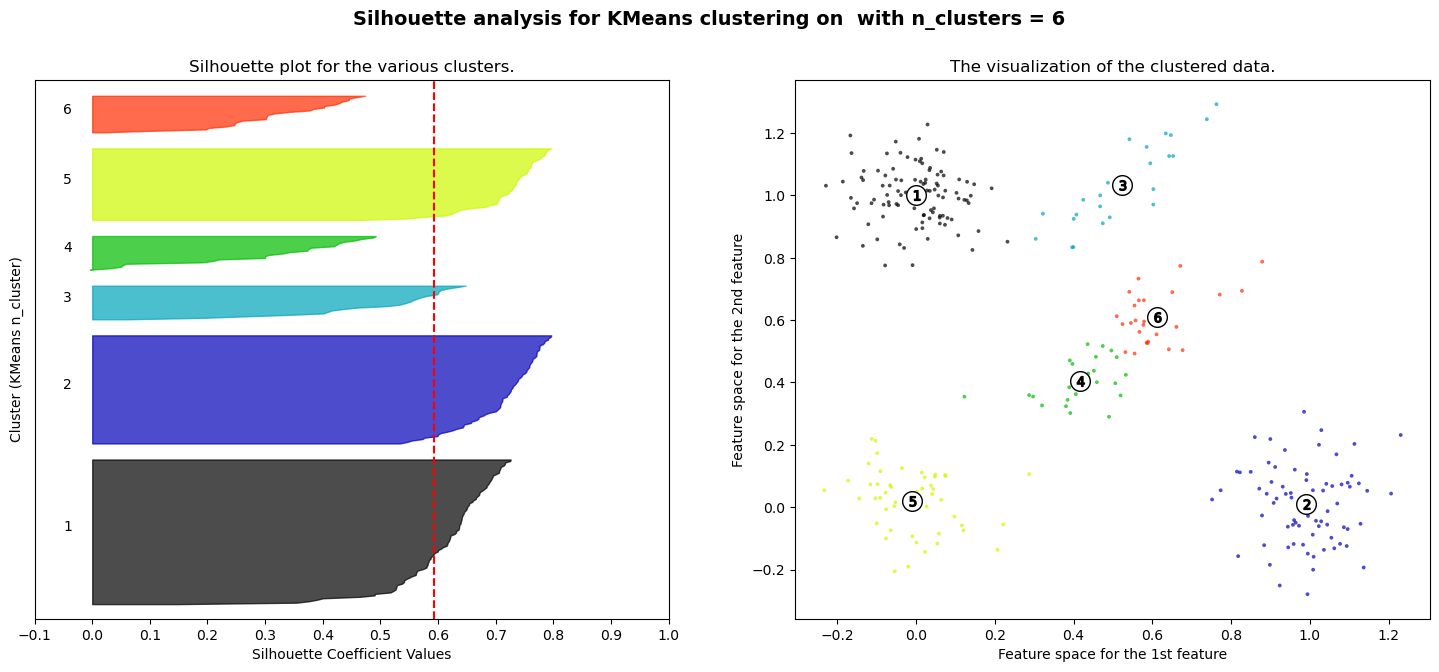

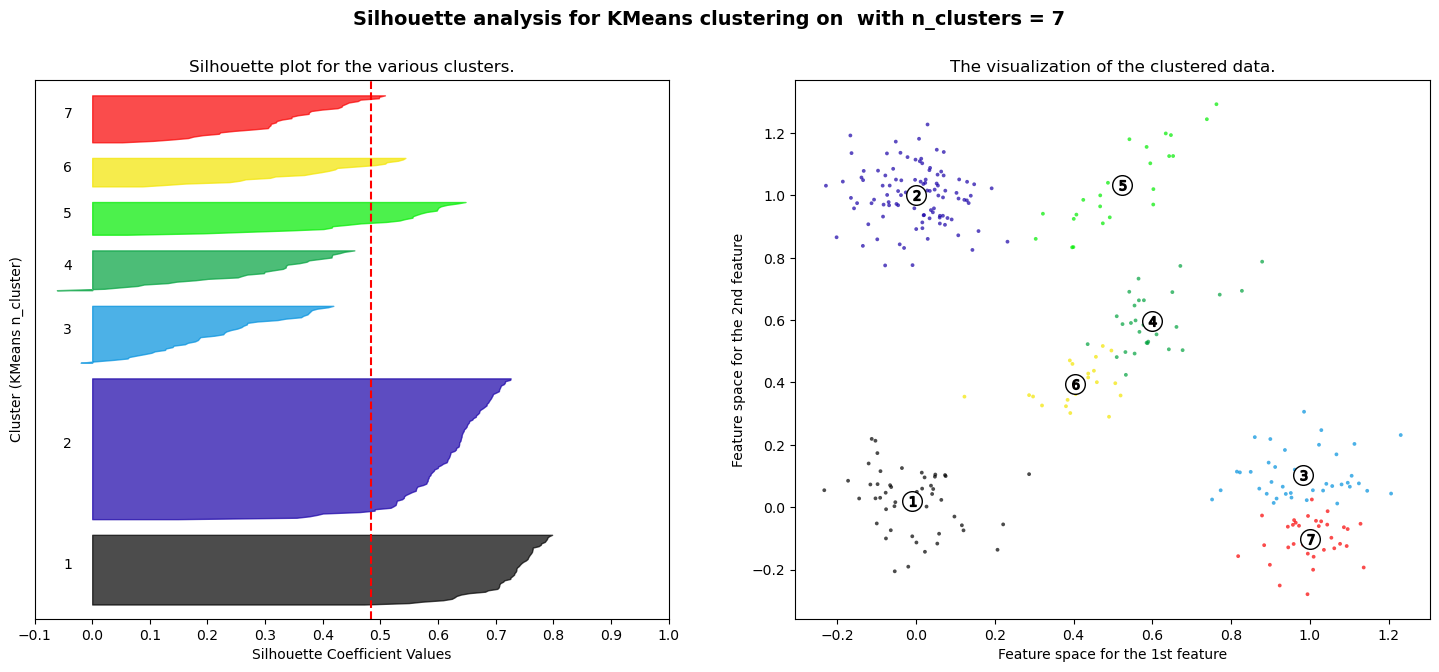

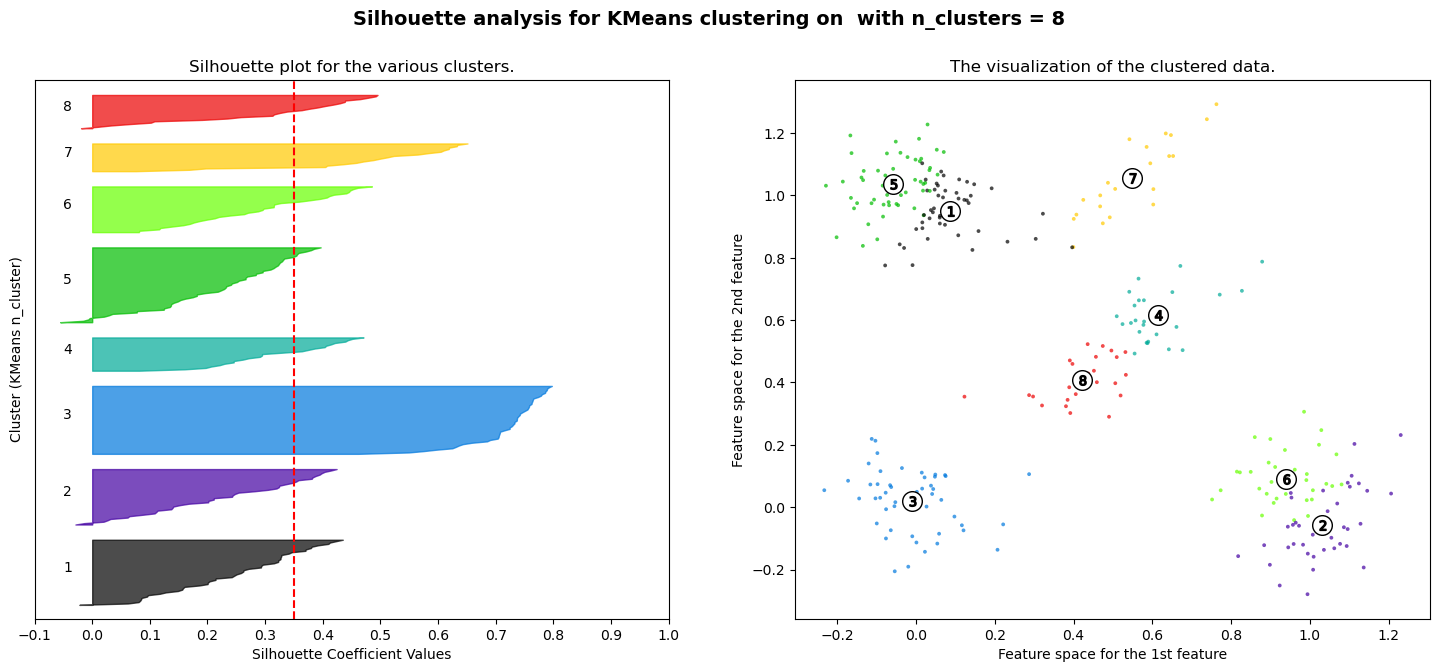

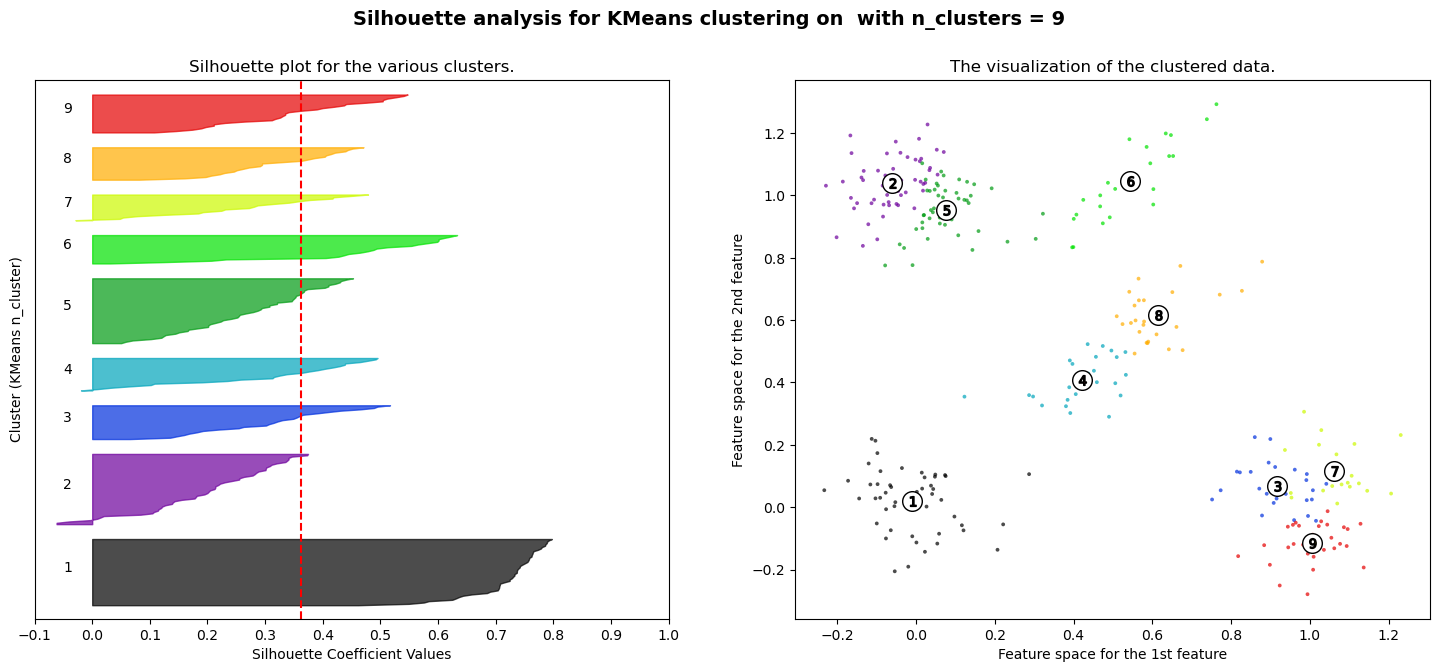

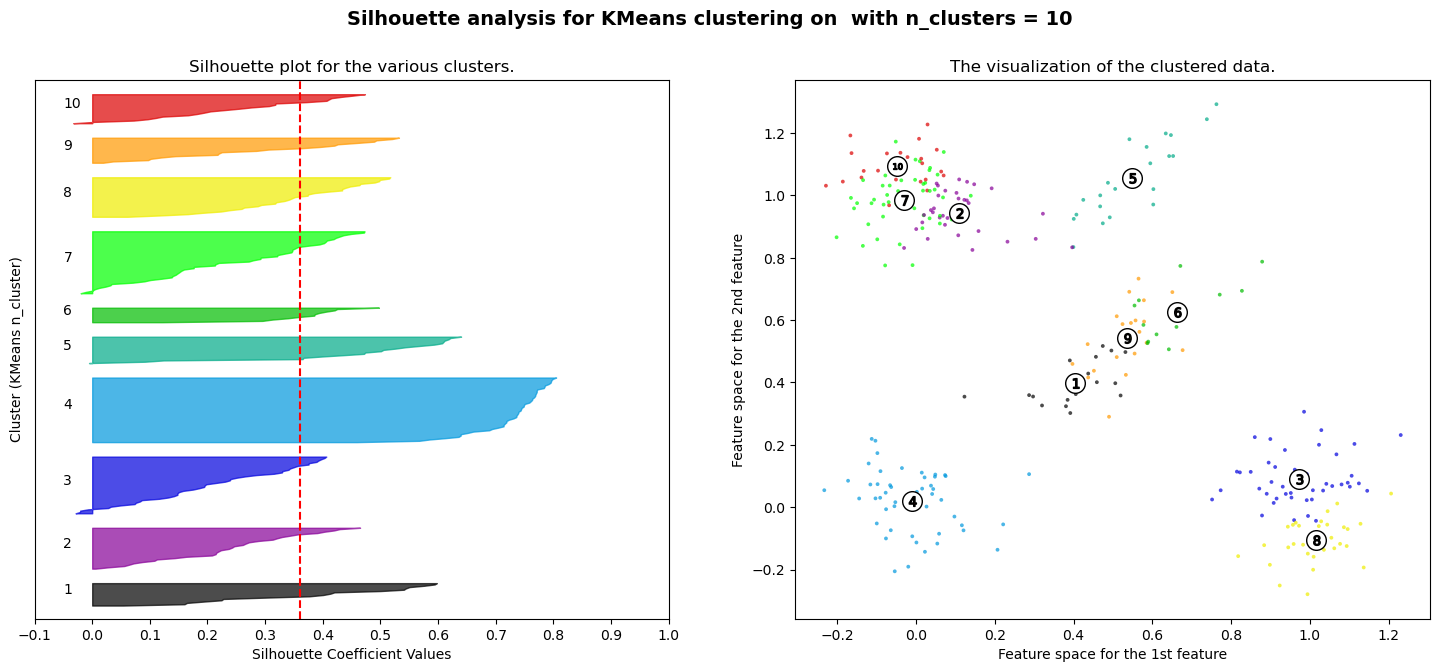

In [5]:
def silhouette(X, range_n_clusters, title):
    print("Running Silhouette Analysis on " + title + "...")
    for n_clusters in n_cluster_range:

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette plot for the various clusters.")
        ax1.set_xlabel("Silhouette Coefficient Values")
        ax1.set_ylabel("Cluster (KMeans n_cluster)")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on " + title +
                      " with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

n_cluster_range = range(2, 11)
silhouette(data, n_cluster_range , "")

# Conclusion

## We can easily observe that the appropriate number of clusters for the model is 4, using the Elbow point method and Silhouette algorithm. The best outcomes will be obtained when we use KMeans with n clusters=4. 

In [6]:
def plot(data, pred, title, num_clusters):
    markers = ['*', 'o', 'x', '1']
    plt.figure(figsize=(20,10))
    for i in range(0, num_clusters):
        cluster_label = "Cluster " + str(i+1)
        plt.scatter(data[pred == i, 0], data[pred == i, 1], s=30, marker=markers[i], label=cluster_label)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = "x", color = "black", label = 'Centroids')
    plt.title(title)
    plt.legend()
    plt.show()

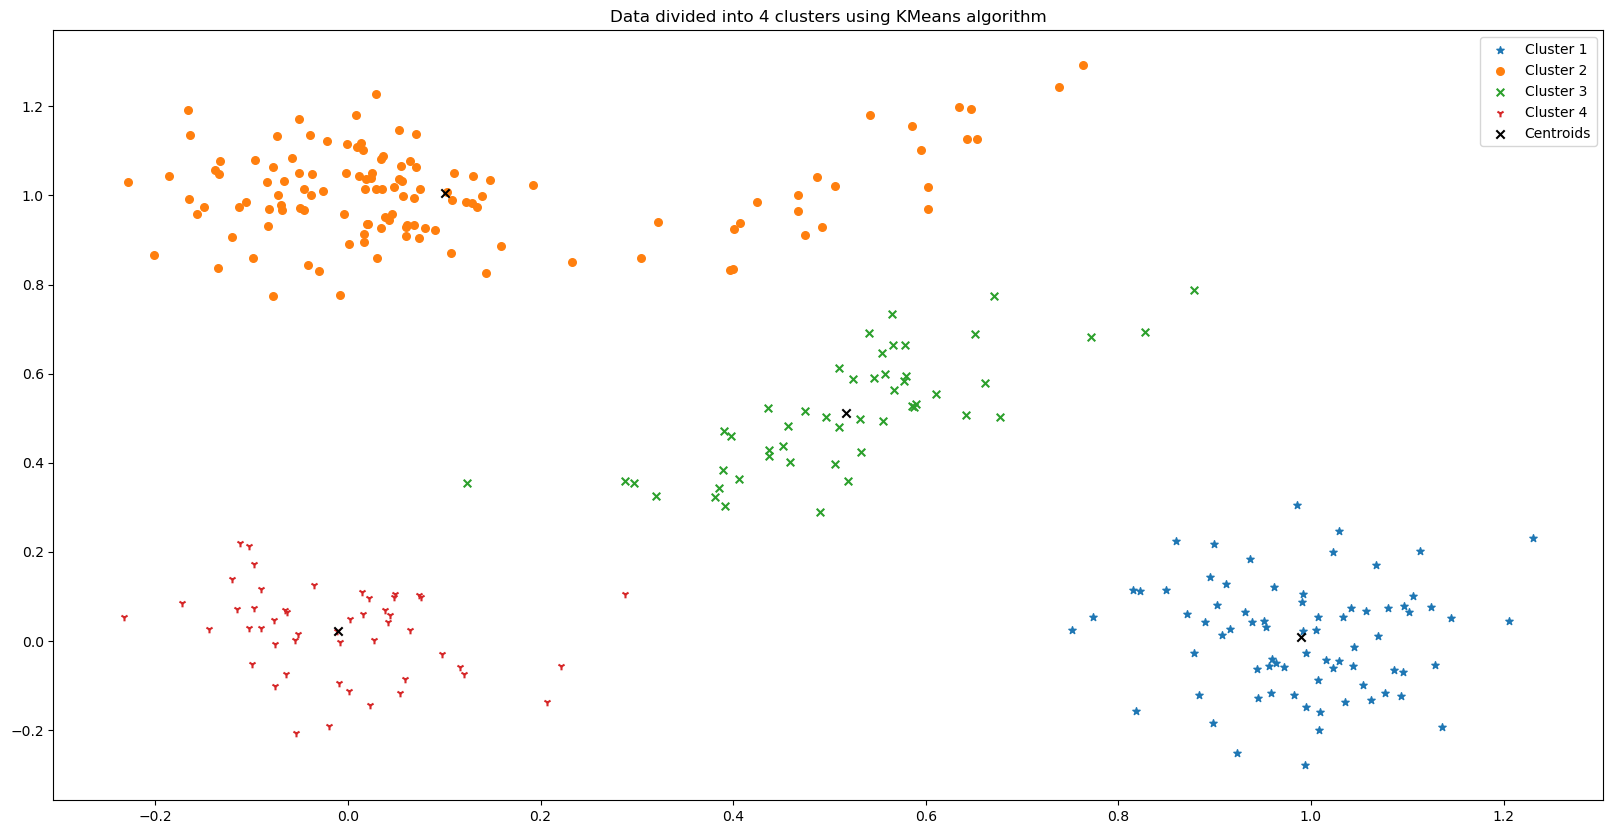

In [7]:
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(data)
plot(data, y_pred, 'Data divided into 4 clusters using KMeans algorithm', 4)